## Q-Learning Implementation in a Grid World

This notebook demonstrates the Q-learning algorithm applied to a simple grid world environment. The implementation is based on the Q-learning algorithm described in Sutton and Barto's "Reinforcement Learning: An Introduction," specifically referencing the content on page 130 of the second edition.

The core idea of Q-learning is to learn an optimal policy by estimating the action-value function, denoted as Q(s, a), which represents the expected cumulative reward of taking action 'a' in state 's' and following an optimal policy thereafter. Q-learning is an off-policy temporal difference (TD) control method, meaning it learns the optimal policy independently of the agent's actions. This allows it to learn from exploratory or even random actions, making it a robust algorithm for various reinforcement learning problems.

The following image illustrates the Q-learning concept as presented in Sutton and Barto's book:

![Sutton and Barto, Reinforcement Learning 2nd. Edition.](./figures/QLearning.png)

In [1]:
import numpy as np

from rlgridworld.standard_grid import create_standard_grid

### Q-Learning Algorithm Implementation

The following code implements the Q-learning algorithm to train an agent to navigate a grid world. The `play_game` function simulates an episode of the game, updating the Q-values based on the agent's experience. Key parameters such as `epsilon` (exploration rate), `gamma` (discount factor), and `alpha` (learning rate) control the learning process. The agent starts at a defined state and continues until it reaches a terminal state, updating its Q-values along the way.

**Algorithm Parameters:**
*   `epsilon`: The probability of exploration, determining how often the agent takes a random action instead of the greedy action.
*   `gamma`: The discount factor, which determines the importance of future rewards. A higher gamma value gives more weight to future rewards.
*   `alpha`: The learning rate, which controls how much the Q-values are updated based on new information.

In [2]:
def play_game(gw, Q):
    epsilon = 0.05 # probability of exploration
    gamma = 0.9 # discount factor for future rewards
    alpha = 0.1 # Q update fraction
    state = (0, 0)
    converged = False
    while not converged:
        action, _ = max_dict(Q[state])
        all_actions = gw.valid_decisions(state)
        action = random_action(action, all_actions, epsilon)
        reward = gw.get_reward_for_action(state, action)
        stateprime = move(state, action)
        iprime, jprime = stateprime
        if not gw.is_terminal(stateprime):
            _, destvalue = max_dict(Q[stateprime])
            Q[state][action] = Q[state][action] + alpha*(reward + gamma*destvalue - Q[state][action])
            state = stateprime
        if gw.is_terminal(stateprime):
            Q[state][action] = Q[state][action] + alpha*(reward - Q[state][action]) 
            converged = True
    return Q

In [3]:
def move(state, action):
    i, j = state
    if action == 'left':
        j = j-1
    if action == 'right':
        j = j+1
    if action == 'down':
        i = i-1
    if action == 'up':
        i = i+1
    return (i, j)

In [4]:
def random_action(action, all_actions, epsilon):
    p = np.random.random_sample()
    if p < (1 - epsilon):
        return action
    else:
        return np.random.choice(all_actions)

In [5]:
def max_dict(d):
    max_key = None
    max_val = float('-inf')
    for k, v in d.items():
        if v > max_val:
            max_val = v
            max_key = k
    return max_key, max_val

In [6]:
def init_Q(gw):
    Q = {}
    for i in range(0, gw.M):
        for j in range(0, gw.N):
            state = (i,j)
            if not gw.is_barrier(state) and not gw.is_terminal(state):
                Q[state] = {}
                all_actions = gw.valid_decisions(state)
                for a in all_actions:
                    Q[state][a] = 0
    return Q

### Grid World Initialization

Here, we create the standard grid world environment and initialize the Q-value dictionary. The grid world is a 2D environment with specified start and end states, barriers, and rewards. The Q-value dictionary stores the estimated Q-values for each state-action pair. Initially, all Q-values are set to zero.

In [7]:
gw = create_standard_grid()

In [8]:
Q = init_Q( gw )

### Initial Q-Values

The initial Q-value dictionary contains the Q-values for all possible state-action pairs in the grid world. Each state is represented as a tuple (row, column), and the actions are 'left', 'right', 'up', and 'down'. The Q-values are initially set to 0.0. The tuples at the beginning of each line represent the dictionary keys, and each dictionary value is another dictionary. For the second dictionary, the decisions are the dictionary keys. The values in this dictionary are the Q values for each action at the designated state.

In [9]:
Q

{(0, 0): {'right': 0, 'up': 0},
 (0, 1): {'left': 0, 'right': 0},
 (0, 2): {'left': 0, 'right': 0, 'up': 0},
 (0, 3): {'left': 0, 'up': 0},
 (1, 0): {'down': 0, 'up': 0},
 (1, 2): {'right': 0, 'down': 0, 'up': 0},
 (2, 0): {'right': 0, 'down': 0},
 (2, 1): {'left': 0, 'right': 0},
 (2, 2): {'left': 0, 'right': 0, 'down': 0}}

### Playing the Game

The `play_game` function simulates one episode of the game. During each episode, the agent starts at the initial state and takes actions based on the Q-values and the exploration rate (`epsilon`). The Q-values are updated using the Q-learning update rule. This process continues until the agent reaches a terminal state.

In [10]:
Q = play_game(gw, Q)

### Updated Q-Values After One Iteration

After playing one iteration of the game, the Q-values are updated based on the agent's experience. The `alpha` factor in the Q-value update rule determines how much the Q-values are adjusted. Note the effect of the alpha factor in the updates of the Q values.

In [11]:
Q

{(0, 0): {'right': 0.0, 'up': 0.0},
 (0, 1): {'left': 0.0, 'right': 0.0},
 (0, 2): {'left': 0.0, 'right': 0, 'up': 0.0},
 (0, 3): {'left': 0, 'up': 0},
 (1, 0): {'down': 0.0, 'up': 0},
 (1, 2): {'right': -0.1, 'down': 0, 'up': 0},
 (2, 0): {'right': 0, 'down': 0},
 (2, 1): {'left': 0, 'right': 0},
 (2, 2): {'left': 0, 'right': 0, 'down': 0}}

### Playing the Game Multiple Times

By playing the game multiple times, the agent learns to make better decisions and the Q-values converge towards the optimal values. The following code plays the game for another iteration and displays the updated Q-values.

In [12]:
Q = play_game(gw, Q)

In [13]:
Q

{(0, 0): {'right': 0.0, 'up': 0.0},
 (0, 1): {'left': 0.0, 'right': 0.0},
 (0, 2): {'left': 0.0, 'right': 0.0, 'up': 0.0},
 (0, 3): {'left': 0.0, 'up': -0.1},
 (1, 0): {'down': 0.0, 'up': 0.0},
 (1, 2): {'right': -0.1, 'down': 0.0, 'up': 0},
 (2, 0): {'right': 0.0, 'down': 0.0},
 (2, 1): {'left': 0.0, 'right': 0.0},
 (2, 2): {'left': 0.0, 'right': 0, 'down': 0}}

### Training the Agent

To train the agent effectively, we need to play the game many times. The following code plays the game 10,000 times and updates the Q-values accordingly. This allows the agent to explore the environment and learn the optimal policy.

In [14]:
for _ in range(10000):
    Q = play_game(gw, Q)

In [15]:
Q

{(0, 0): {'right': 0.5314409999982149, 'up': 0.6560999999999979},
 (0, 1): {'left': 0.5904899999999977, 'right': 0.3340773402574159},
 (0, 2): {'left': 0.5314409951927251,
  'right': 0.024214856660908536,
  'up': 0.043046698752991115},
 (0, 3): {'left': 0.162361316099566, 'up': -0.1},
 (1, 0): {'down': 0.5904899999997081, 'up': 0.7289999999999983},
 (1, 2): {'right': -0.34390000000000004,
  'down': 0.478296751420081,
  'up': 0.3685589999999998},
 (2, 0): {'right': 0.8099999999999987, 'down': 0.6560999999998001},
 (2, 1): {'left': 0.7289999999983406, 'right': 0.899999999999999},
 (2, 2): {'left': 0.8099999974863857,
  'right': 0.9999999999999996,
  'down': 0.4304659933034021}}

### Extracting the Policy

After training the agent, we can extract the optimal policy from the Q-values. The policy is a mapping from each state to the best action to take in that state. The following code extracts the policy and value function from the Q-table and prints the policy and values for each state in the grid world.

In [16]:
policy = {}
for i in range(gw.M):
    for j in range(gw.N):
        state = (i,j)
        if gw.is_barrier(state):
            policy[state] = ''
        if gw.is_terminal(state):
            policy[state] = ''
        if not gw.is_barrier(state) and not gw.is_terminal(state):
            action, value = max_dict(Q[state])
            gw.set_value(state, value)
            policy[state] = action

In [17]:
gw.print_values()
gw.print_policy(policy)

-------------------------------------
|   0.81 |   0.90 |   1.00 |   0.00 |
-------------------------------------
|   0.73 |   0.00 |   0.48 |   0.00 |
-------------------------------------
|   0.66 |   0.59 |   0.53 |   0.16 |
-------------------------------------
-------------------------------------
|  Right |  Right |  Right |        |
-------------------------------------
|     Up |        |   Down |        |
-------------------------------------
|     Up |   Left |   Left |   Left |
-------------------------------------


### Visualizing the Learned Policy

The following cell visualizes the learned policy on the grid. Arrows indicate the optimal action determined by the Q-learning agent for each state. States without arrows are either terminal states or barriers.

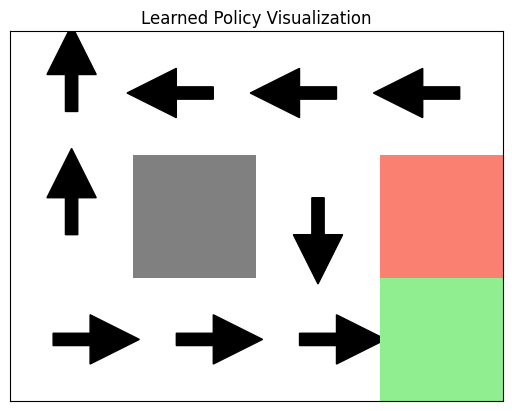

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Grid dimensions (assuming M rows, N columns)
M = gw.M
N = gw.N

# Draw grid lines
ax.set_xticks(np.arange(-.5, N, 1), minor=True)
ax.set_yticks(np.arange(-.5, M, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

# Set limits and remove axis labels
ax.set_xlim(-0.5, N - 0.5)
ax.set_ylim(-0.5, M - 0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0) # Hide ticks

# Define arrow properties
arrow_props = dict(facecolor='black', width=0.1, head_width=0.4, head_length=0.4)

# Plot arrows for the policy
for state, action in policy.items():
    i, j = state
    # Convert grid coords (i, j) to plot coords (x, y)
    x, y = j, M - 1 - i
    
    # Skip barriers and terminals
    if gw.is_barrier(state) or gw.is_terminal(state):
        # Optionally mark barriers/terminals (e.g., with color)
        if gw.is_barrier(state):
             ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, facecolor='gray'))
        elif state == (2, 3): # Positive reward goal state
             ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, facecolor='lightgreen')) # Goal
        elif gw.is_terminal(state): # Other terminal states (e.g., (1, 3))
             ax.add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, facecolor='salmon'))
        continue
        
    dx, dy = 0, 0
    if action == 'up':
        dy = 0.5
    elif action == 'down':
        dy = -0.5
    elif action == 'left':
        dx = -0.5
    elif action == 'right':
        dx = 0.5
        
    # Draw arrow if action is defined
    if dx != 0 or dy != 0:
        ax.arrow(x - dx*0.3, y - dy*0.3, dx*0.6, dy*0.6, **arrow_props)

# Invert y-axis to match grid convention (origin top-left)
# ax.invert_yaxis() # Keep origin bottom-left for standard plot view
ax.set_aspect('equal', adjustable='box') # Ensure squares are square
plt.title('Learned Policy Visualization')
plt.show()